# Part II - Flight Delays
## by Zane Sorenson

## Investigation Overview

Flying is usually the most stressful part of vacation and delays can increase that pressure. I wanted to take a look at overall flight delays, airlines, and the types of delays they see. Having a little more knowledge about what is going on may make the situation for travelers a little easier.

## Dataset Overview and Executive Summary


### Data

The data I am using comes from the Bureau of Transportation Statistics and contains data on all United States flights. I have subset the data down to the years between 2013 and 2018, as well have focused on the 6 most active airlines:

* American Airlines
* Delta Air Lines
* ExpressJet Airlines
* SkyWest Airlines
* United Air Lines
* Southwest

### Key Insights

* More than 60% of flights arrive ahead of schedule
* Compared to other top airlines, Delta flights arrive earler on average
* Southwest is best at limiting the delays that are under their control

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
trim_df = pd.read_csv('trim_df.csv')
airline_df = pd.read_csv('airline_df.csv')
delay_df = pd.read_csv('delay_df.csv')

In [4]:
def plot_label(title, x_label, y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

## Flight Delays

While delays are a frustrating part of traveling it is good to know that if they do happen, they are typically minor.

Looking at the below chart, over 60% of flights actually arrive early to their destination, and nearly 90% are landing within 30 minutes of their scheduled time. This means that while delays can be a headache, most of the time, travelers don't need to deal with them.

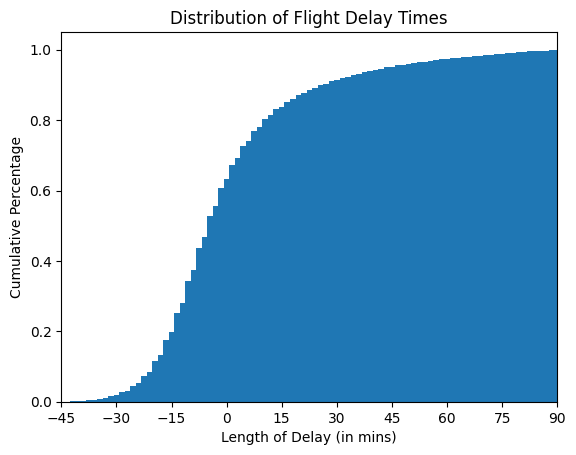

In [5]:
plt.hist(data=trim_df, x='ArrDelay',range=(-45,90), cumulative=True, density=True, bins=np.arange(-45,91,1.5), align='right')
plot_label('Distribution of Flight Delay Times', 'Length of Delay (in mins)', 'Cumulative Percentage')
plt.xticks(np.arange(-45,91,15))
plt.xlim(-45,90);

## Delays by Airlines

Is there a way to limit potential delays as a passenger?

As in any industry, some companies are better at certain things than others, and this holds true for airline delays. The below chart is showing the average flight delay for the top 6 airlines. There is a clear difference between ExpressJet's over 8 minutes average delay and Delta's less than 1 minute delay.

If worried about delays, it may be a good idea to look into Delta instead of some of its competitors.

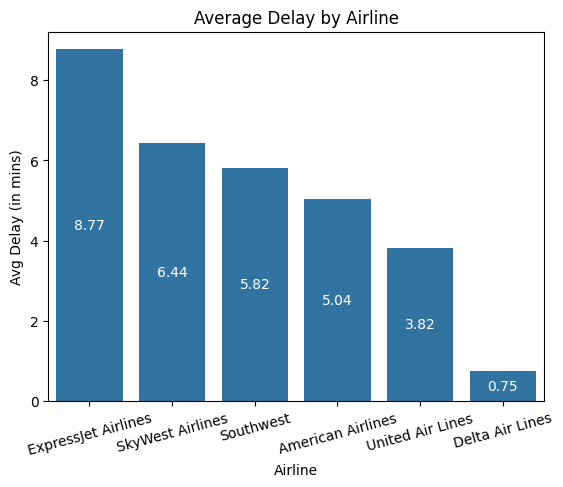

In [6]:
order = airline_df.sort_values(['ArrDelay'], ascending=False)['Reporting_Airline'].tolist()

ax = sns.barplot(data=airline_df, x='Reporting_Airline', y='ArrDelay', color='tab:blue', order=order)
plot_label('Average Delay by Airline', 'Airline', 'Avg Delay (in mins)')
plt.xticks(rotation=15)
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=10, label_type='center', color='white');

## Types of Delays

Knowing what is causing a delay and how long it might be, can help travelers feel more informed and better prepared to handle the situation.

There are 5 types of delays:

* Weather Delay: Extreme or hazardous weather conditions effecting departure, flight, or arrival.
* Late Aircraft Delay: The airplane the flight is using was late to get to the current airport.
* Carrier Delay: Delays that are within the control of the airline; i.e. baggage loading, aircraft cleaning, crew changes, etc.
* NAS Delay: Airport operations that delay a flight; i.e. heavy traffic, ATC
* Security Delay: Can include long lines at security screening areas preventing passengers from getting to the gate, evacuation of terminals or aircraft, or security breaches on the aircraft.

It can be interesting and fruitful to see what the average NAS and Security delays are for an airline, these are things that are out of their control. The Carrier delay on the otherhand is completely within their control, and a reflection on the company.

Looking at the below chart, you can see that Southwest actually has the lowest average Carrier delay (around 25 minutes), while SkyWest's average delay is about 2.5 times longer (around 65 minutes). So while Southwest can't control the weather, do they a good job of keeping their business in order to get their customers to their destination as fast as possible.

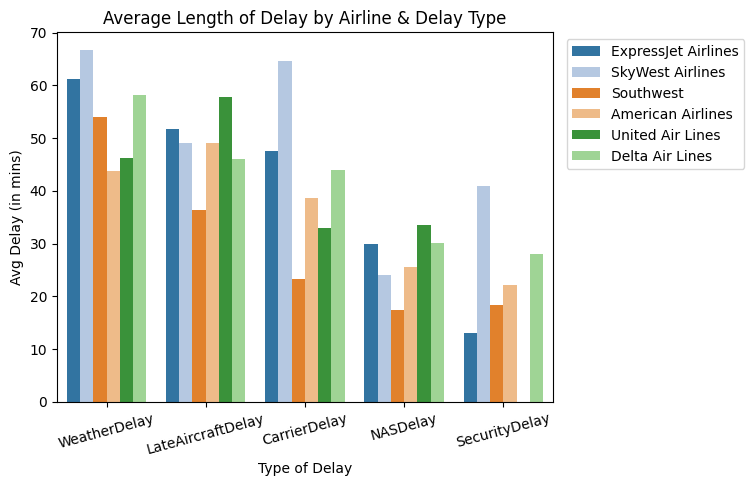

In [7]:
delay_order = ['WeatherDelay', 'LateAircraftDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay']

sns.barplot(data=delay_df, x='DelayType', y='DelayAmount', hue='Reporting_Airline', errorbar=None, palette='tab20',
            order=delay_order, hue_order=order)
plot_label('Average Length of Delay by Airline & Delay Type', 'Type of Delay', 'Avg Delay (in mins)')
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.4, 1));